In [ ]:
import numpy as np
import re
from tensorflow.keras.preprocessing.text import Tokenizer

In [ ]:
data = """Deep learning (also known as deep structured learning) is part of a broader family of machine learning methods based on artificial neural networks with representation learning. Learning can be supervised, semi-supervised or unsupervised. Deep-learning architectures such as deep neural networks, deep belief networks, deep reinforcement learning, recurrent neural networks, convolutional neural networks and Transformers have been applied to fields including computer vision, speech recognition, natural language processing, machine translation, bioinformatics, drug design, medical image analysis, climate science, material inspection and board game programs, where they have produced results comparable to and in some cases surpassing human expert performance."""
data = data.split('.')

In [ ]:
clean_sent=[]
for sentence in data:
    if sentence=="":
        continue
    sentence = re.sub('[^A-Za-z0-9]+', ' ', (sentence))
    sentence = re.sub(r'(?:^| )\w (?:$| )', ' ', (sentence)).strip()
    sentence = sentence.lower()
    clean_sent.append(sentence)

clean_sent

['deep learning also known as deep structured learning is part of a broader family of machine learning methods based on artificial neural networks with representation learning',
 'learning can be supervised semi supervised or unsupervised',
 'deep learning architectures such as deep neural networks deep belief networks deep reinforcement learning recurrent neural networks convolutional neural networks and transformers have been applied to fields including computer vision speech recognition natural language processing machine translation bioinformatics drug design medical image analysis climate science material inspection and board game programs where they have produced results comparable to and in some cases surpassing human expert performance']

In [ ]:

tokenizer = Tokenizer()
tokenizer.fit_on_texts(clean_sent)
word2idx = tokenizer.word_index
idx2word = {v: k for k, v in word2idx.items()}
vocab_size = len(word2idx) + 1

In [ ]:
sequences = tokenizer.texts_to_sequences(clean_sent)
# print(sequences)

In [ ]:
idx2word

{1: 'learning',
 2: 'deep',
 3: 'networks',
 4: 'neural',
 5: 'and',
 6: 'as',
 7: 'of',
 8: 'machine',
 9: 'supervised',
 10: 'have',
 11: 'to',
 12: 'also',
 13: 'known',
 14: 'structured',
 15: 'is',
 16: 'part',
 17: 'a',
 18: 'broader',
 19: 'family',
 20: 'methods',
 21: 'based',
 22: 'on',
 23: 'artificial',
 24: 'with',
 25: 'representation',
 26: 'can',
 27: 'be',
 28: 'semi',
 29: 'or',
 30: 'unsupervised',
 31: 'architectures',
 32: 'such',
 33: 'belief',
 34: 'reinforcement',
 35: 'recurrent',
 36: 'convolutional',
 37: 'transformers',
 38: 'been',
 39: 'applied',
 40: 'fields',
 41: 'including',
 42: 'computer',
 43: 'vision',
 44: 'speech',
 45: 'recognition',
 46: 'natural',
 47: 'language',
 48: 'processing',
 49: 'translation',
 50: 'bioinformatics',
 51: 'drug',
 52: 'design',
 53: 'medical',
 54: 'image',
 55: 'analysis',
 56: 'climate',
 57: 'science',
 58: 'material',
 59: 'inspection',
 60: 'board',
 61: 'game',
 62: 'programs',
 63: 'where',
 64: 'they',
 65: 'pr

In [ ]:
vocab_size = len(tokenizer.word_index) + 1
emb_size = 10
context_size = 2

contexts = []
targets = []

for sequence in sequences:
    for i in range(context_size, len(sequence) - context_size):
        target = sequence[i]
        context = [sequence[i - 2], sequence[i - 1], sequence[i + 1], sequence[i + 2]]
        contexts.append(context)
        targets.append(target)
print(contexts, "\n")
print(targets)

[[2, 1, 13, 6], [1, 12, 6, 2], [12, 13, 2, 14], [13, 6, 14, 1], [6, 2, 1, 15], [2, 14, 15, 16], [14, 1, 16, 7], [1, 15, 7, 17], [15, 16, 17, 18], [16, 7, 18, 19], [7, 17, 19, 7], [17, 18, 7, 8], [18, 19, 8, 1], [19, 7, 1, 20], [7, 8, 20, 21], [8, 1, 21, 22], [1, 20, 22, 23], [20, 21, 23, 4], [21, 22, 4, 3], [22, 23, 3, 24], [23, 4, 24, 25], [4, 3, 25, 1], [1, 26, 9, 28], [26, 27, 28, 9], [27, 9, 9, 29], [9, 28, 29, 30], [2, 1, 32, 6], [1, 31, 6, 2], [31, 32, 2, 4], [32, 6, 4, 3], [6, 2, 3, 2], [2, 4, 2, 33], [4, 3, 33, 3], [3, 2, 3, 2], [2, 33, 2, 34], [33, 3, 34, 1], [3, 2, 1, 35], [2, 34, 35, 4], [34, 1, 4, 3], [1, 35, 3, 36], [35, 4, 36, 4], [4, 3, 4, 3], [3, 36, 3, 5], [36, 4, 5, 37], [4, 3, 37, 10], [3, 5, 10, 38], [5, 37, 38, 39], [37, 10, 39, 11], [10, 38, 11, 40], [38, 39, 40, 41], [39, 11, 41, 42], [11, 40, 42, 43], [40, 41, 43, 44], [41, 42, 44, 45], [42, 43, 45, 46], [43, 44, 46, 47], [44, 45, 47, 48], [45, 46, 48, 8], [46, 47, 8, 49], [47, 48, 49, 50], [48, 8, 50, 51], [8, 

In [ ]:
for i in range(5):
    words = []
    target = idx2word.get(targets[i])
    for j in contexts[i]:
        words.append(idx2word.get(j))
    print(words," -> ", target)

['deep', 'learning', 'known', 'as']  ->  also
['learning', 'also', 'as', 'deep']  ->  known
['also', 'known', 'deep', 'structured']  ->  as
['known', 'as', 'structured', 'learning']  ->  deep
['as', 'deep', 'learning', 'is']  ->  structured


In [ ]:
X = np.array(contexts)
Y = np.array(targets)

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Lambda
from tensorflow.keras import  backend as K


In [ ]:

model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=emb_size, input_length=2*context_size),
    Lambda(lambda x: tf.reduce_mean(x, axis=1)),
    Dense(256, activation='relu'),
    Dense(512, activation='relu'),
    Dense(vocab_size, activation='softmax')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [ ]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X, Y, epochs=200, verbose=0)

<Axes: >

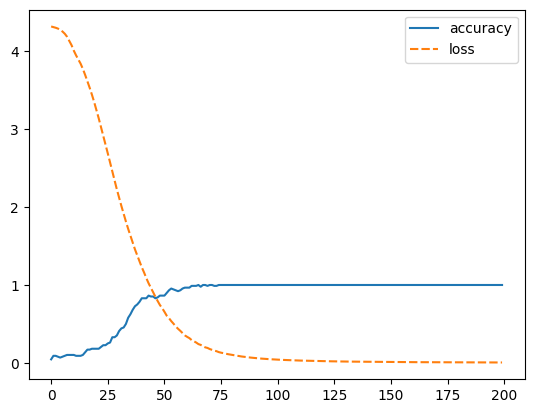

In [ ]:
import seaborn as sns
sns.lineplot(model.history.history)

In [ ]:
fig, ax1 = plt.subplots(figsize=(8, 6))

# Accuracy
ax1.plot(df['accuracy'], color='tab:blue', label='Accuracy')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Accuracy', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Loss (second axis)
ax2 = ax1.twinx()
ax2.plot(df['loss'], color='tab:orange', linestyle='--', label='Loss')
ax2.set_ylabel('Loss', color='tab:orange')
ax2.tick_params(axis='y', labelcolor='tab:orange')

fig.tight_layout()
plt.show()


In [ ]:
test_sentenses = [
    "known as structured learning",
    "transformers have applied to",
    "where they produced results",
    "cases surpassing expert performance"
]

In [ ]:
for sent in test_sentenses:
    test_words = sent.split(" ")
    x_test =[]
    for i in test_words:
        x_test.append(word_to_index.get(i))
    x_test = np.array([x_test])

    pred = model.predict(x_test)
    pred = np.argmax(pred[0])
    print("pred ", test_words, "\n=", index_to_word.get(pred),"\n\n")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
pred  ['known', 'as', 'structured', 'learning'] 
= deep 


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
pred  ['transformers', 'have', 'applied', 'to'] 
= been 


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
pred  ['where', 'they', 'produced', 'results'] 
= have 


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
pred  ['cases', 'surpassing', 'expert', 'performance'] 
= human 


